In [1]:
%%capture
# Install the autograder to check your answers as you go along
import sys
!{sys.executable} -m pip install otter-grader
# Initialize Otter 
import otter
grader = otter.Notebook("group_activity8.ipynb")

# In-class coding exercise #8
Objective: In this exercise you will review using Pandas Dataframes and plotting. Additionally, you will practice using SciPy's linear regression.

## Introduction to group coding exercises
Today you’ll work on this exercise in the same groups of 3-4 you were assigned last week, submitting a single notebook file at the end of the class period. Decide amongst yourselves which member will upload the completed notebook to Gradescope this week. Make sure that everyone takes a turn being the “Uploader”. _You cannot upload the final code two weeks in a row._

Designate a different group member to be the "Reporter". The Reporter will be in charge of participating in the group discussion at the end of the class session.

### Workflow
Each question will be timed to ensure that everyone gets to work on at least a part of every question. Group activities are not graded by completeness or correctness, but by effort. We will be breaking down each question in the following order:  
1. Independent work 
2. Group work and discussion on coding question
3. Group work and discussion on reflection questions

You are welcome and encouraged to communicate with other groups and the teaching team when you feel stuck on a problem. 

As a reminder, we will be grading based best practices in coding. These include: 
1) Variables are used to store objects

2) Code is commented adequately

3) Variables are names appropriately

4) Code is efficient with minimal unnecessary lines 

5) Documenting help from outside sources, such as from other groups or online documentation. 

6) Final notebook fully runs from start to finish. A good way to check this is restarting the kernel and fully running through all the cells to check for any errors.

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary, you can also store your answer directly in the answer variables.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

## Note here **and in the Gradescope submission** each of your group members:
1. Alex 
2. Lizzie 
3. Elijah

# Question 1: Global temperature concentrations

The figure below shows CO2 concentration over the past three centuries. We will compare this trend in CO2 with measured global temperature anomalies stored in "NASA_GISS_global_temp.csv" aquired from 
[NASA's Goddard Institute for Space Studies](https://data.giss.nasa.gov/gistemp/). Today you will read this data using Pandas, plot it, and model it using SciPy's linear regression.

<img src="https://i.ibb.co/Hz4rMtc/co2-photo.png" width="700" />

*Image: Atmospheric CO2 from 1700 to 2020. Source: [Scripps/UCSD](https://keelingcurve.ucsd.edu/).*


## Part 1: Plot initial data (20 minutes)
1) Set your `filepath` variable to the string representation to the "NASA_GISS_global_temp.csv" in the "data" folder. 
Load the file as a DataFrame using Pandas into the `global_temp` variable. Using the "index_col" argument, set the "Year" column as your DataFrame indexes to load years as integers.

2) Make a plot of the 1880-2019 time series for Temperature Anomaly. Set the year (now the index) in the x-axis, and the "Temp_anomaly" column in the y-axis. Include the following:

>a) Markers for each data point

>b) Grid

>c) All required plot elements listed in Assignment Instructions

Text(0, 0.5, 'Temporal anomaly')

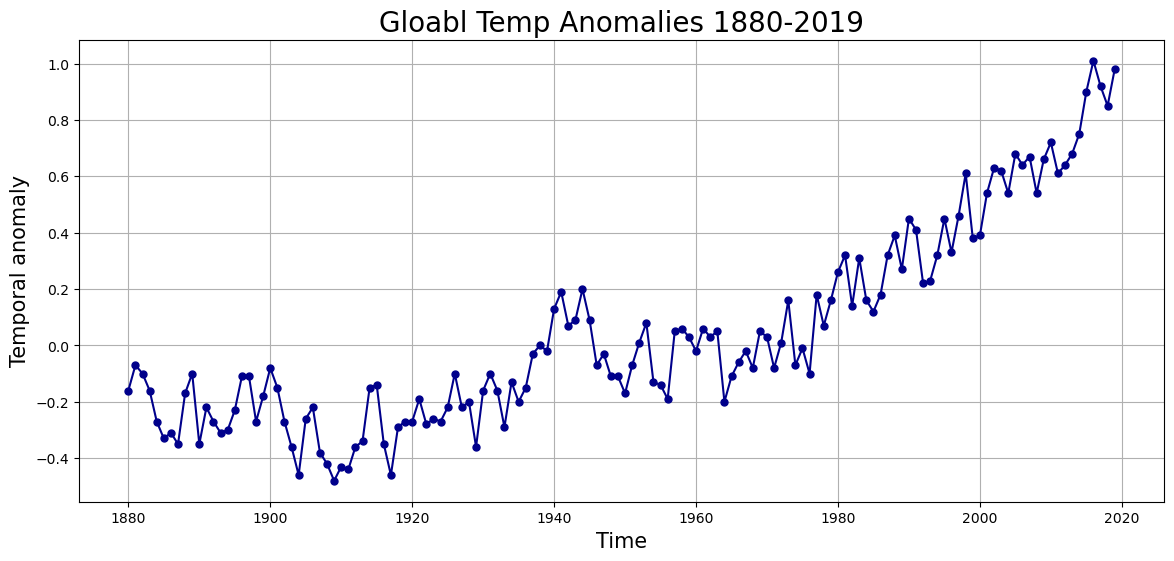

In [16]:
# Import NumPy, Pandas, SciPy, Matplotlib
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# your code

# answer variables
filepath = 'data/NASA_GISS_global_temp.csv' # upload file to filepath
global_temp = pd.read_csv(filepath, index_col = "Year") # load filepath into a new variable 

# create plot 
fig, axs = plt.subplots(figsize=(14,6)) # creates figure with set figsize
axs.grid() # adds grid

# set x and y variables
x = global_temp.index 
y = global_temp['Temp_anomaly']

# plot x and y variables and add title/axis labels
axs.plot(x,y, marker='.', c='darkblue', markersize = 10)
axs.set_title('Gloabl Temp Anomalies 1880-2019', fontsize = 20)
axs.set_xlabel('Time', fontsize = 15) 
axs.set_ylabel('Temporal anomaly', fontsize = 15)

In [17]:
grader.check("Question 1, Part 1")

Question 1, Part 1 results: All test cases passed!

## Part 2: Design linear regression model (25 minutes)
3) Use the scipy.stats `linregress()` function to calculate a linear regression on the entire 1880-2019 time series. Do this in one line of code and store the output in the `slope`, `intercept`, `rvalue`, `pvalue`, and `stderr` variables. **Hint: years (index) are the x values, and Temp_anomalys are the y values (slide 11-12 in prelectures).** (0.5 point)

4) Calculate linear regression fit: (1 point)
>1) Print the slope (including units), **r-squared value** (`rvalue` squared), and p-value rounded to 3 decimal places.
>2) Store the years (index) from `global_temp` in the `x_values` variable.
>3) Use the `slope`, `intercept`, and your `x_values` to calculate the linear regression fit*. Store the resulting array in the `y_values` variable. 

*_HINT: Linear Regression follows the formula below_
> **y = mx+b**

5) Plot your linear regression fit and compare against the original data: (0.5 point):
>1) Copy and paste your code to plot the temperature anomaly time series from part 1. 
>2) Plot the regression line that you just calculated on top using **different line type and color than the default settings**. 
>3) Add a legend (make sure to use the "label" argument in the `plot()` function).

Slope = 0.007 C/y
R^2 = 0.75
P = 0.0


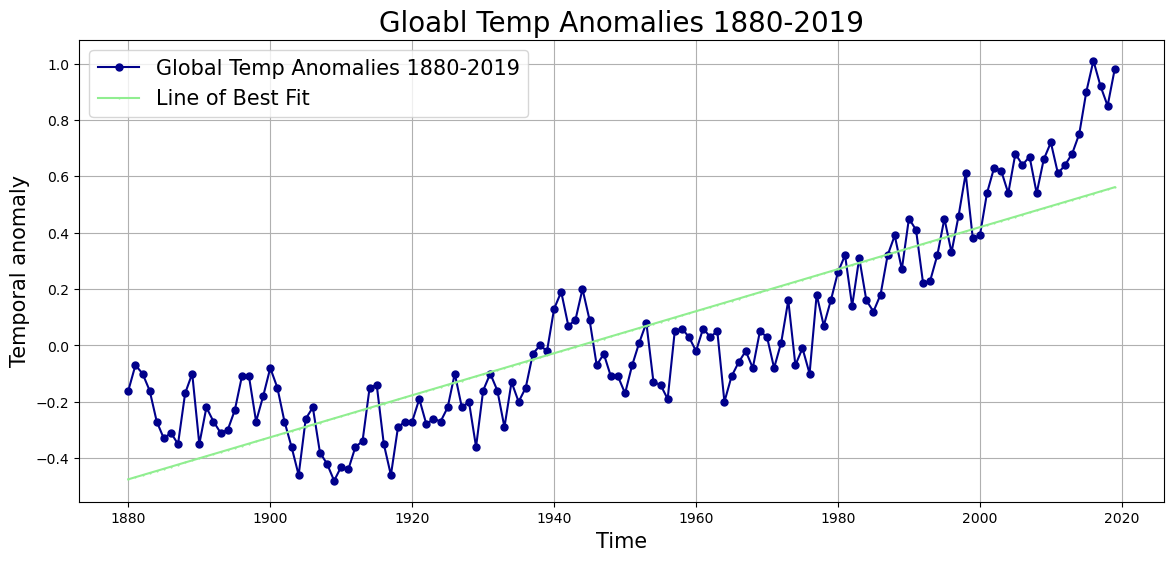

In [46]:
# your code

# answer variables
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)

# print slope, R squared, and p value of the linear regression 
print('Slope =', round(slope,3), 'C/y')
print('R^2 =', round(rvalue ** 2, 3))
print('P =', round(pvalue, 3))

# store linregress value into new x and y arrays
x_values = x
y_values = slope*x_values + intercept

# copy and paste plot from part 1 and add line for linear regression fit

# create plot 
fig, axs = plt.subplots(figsize=(14,6)) # creates figure with set figsize
axs.grid() # adds grid

# set x and y variables
x = global_temp.index 
y = global_temp['Temp_anomaly']

# plot x and y variables and add title/axis labels
axs.plot(x,y, marker='.', c='darkblue', markersize = 10, label = 'Global Temp Anomalies 1880-2019')
axs.set_title('Gloabl Temp Anomalies 1880-2019', fontsize = 20)
axs.set_xlabel('Time', fontsize = 15) 
axs.set_ylabel('Temporal anomaly', fontsize = 15)

# add line of best fit
axs.plot(x_values, y_values, marker='.', c='lightgreen', markersize = 1, label = 'Line of Best Fit')

# add legend
axs.legend(fontsize = 15)

In [47]:
grader.check("Question 1, Part 2")

Question 1, Part 2 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Data Interpretation (10 minutes)
6) Answer the following questions in a text box (reference SciPy lecture slides if needed):

>a. How much variance in the data is explained by the regression? _HINT: calculate r^2 value to get the variance, check slide 13 on how to get r^2 from the rvalue_

>b. Looking at the p-value, is the 1880-2019 trend significant at the 95% confidence level? How can you tell?

>c. Is this linear regression appropriate for this data? Why or why not? (2-3 sentences)


a. 75%
b. Yes, because the p value is less than 0.05, making it impossible for to reject the null hypothesis
c. No, an exponential representation would better match the data being reflected. The straight line would eventually misrepresent  future years, as the Temp anomalies continues to increase an a nonconstant rate.

<!-- END QUESTION -->

## Question 2: CO2 Time Series
Now that we've looked at the global temperature data, we can start our comparison against CO2 data. Today, we will be using observations from the Mauna Loa Laboratory, otherwise known as the Keeling Curve [(Keeling et al. 2017)](https://library.ucsd.edu/dc/object/bb3859642r). 


### Part 1 (10 minutes)
1) Using `pandas.read_csv()`, load the data from the "keeling_curve_monthly.csv" file in the "data" folder. Set your dataframe to the `keeling` variable. 

2) Reset the "time" column to datetime object using `pandas to_datetime()`. 

2) Make a quick plot of the CO2 time series. Don't worry if the plot doesn't look very clean. Answer the following questions:

>a) What do you notice about the data?

>b) Are the recurring patterns in the time series? 

a. There are four gaps of missing data, but the general trend of CO2 is increasing as years increase.
b. There are periodic increasing the decreasing zig zags that may indicate seasonal changes.

Text(0, 0.5, 'CO2 (ppm)')

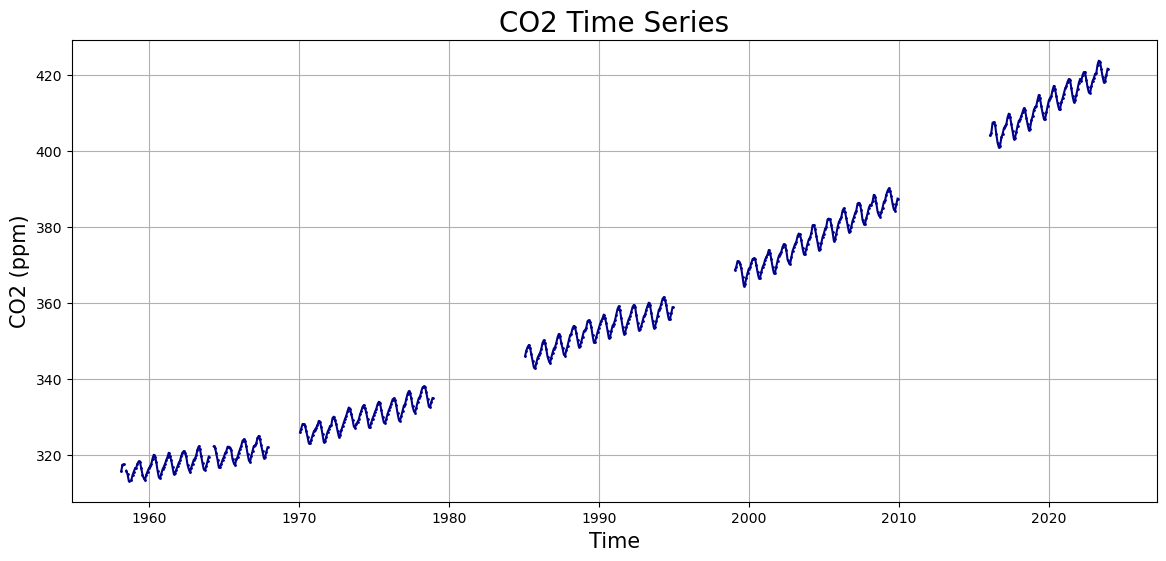

In [66]:
# load data and clean
file = 'data/keeling_curve_monthly.csv'
keeling = pd.read_csv(file)
keeling['time'] = pd.to_datetime(keeling['time']) # change 'time' col to datetime

# your code for plotting

# create plot 
fig, axs = plt.subplots(figsize=(14,6)) # creates figure with set figsize
axs.grid() # adds grid

# set x and y variables
x = keeling['time']
y = keeling['CO2']

# plot x and y variables and add title/axis labels
axs.plot(x,y, marker='.', c='darkblue', markersize = 2)
axs.set_title('CO2 Time Series', fontsize = 20)
axs.set_xlabel('Time', fontsize = 15) 
axs.set_ylabel('CO2 (ppm)', fontsize = 15)

In [67]:
grader.check("Question 1, Part 4")

Question 1, Part 4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Part 2: 1-D Interpolate Missing Data (20 minutes)
Oh no, Todd strikes again! It looks like Kathy's cat sat on her computer before she uploaded the data to GitHub :( 

<img src = "https://i.ibb.co/7r2hcLZ/IMG-3273-2.jpg" width = 250>

1) There are missing values for certain years within the dataset. What are the missing values represented by? Write your answer in a comment in the solution cell. 

2) Perform 1D interpolation using pandas `interpolate()` on the "CO2" column of `keeling`. Create a new column in your `keeling` dataframe named "filled" to place your interpolated values. 

3) Create a plot of your new time series with interpolated values. By default, the interpolation method is _linear_. Experiment with different methods by checking the [documentaion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html). 
How does choosing different methods impact your interpretation? Write your answer in a comment in the solution cell. 

Text(0, 0.5, 'CO2 (ppm)')

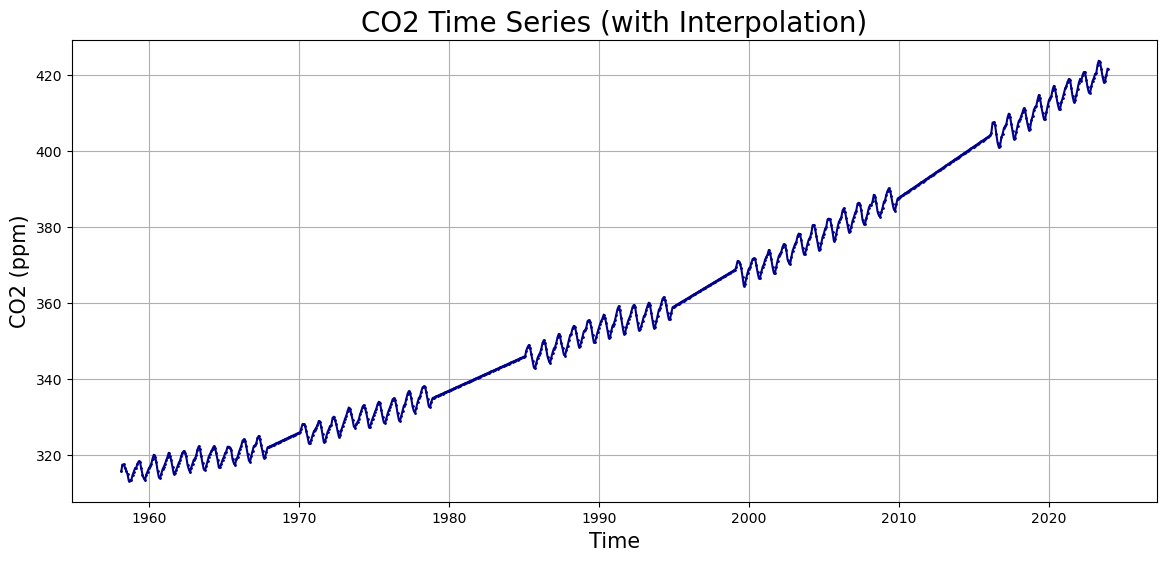

In [77]:
## response to step 1
#The missing values are represented by gaps within the graph
## response to step 3
#Changing the different 
# your code for interpolation

keeling['filled'] = keeling['CO2'].interpolate(method = 'linear')
y_filled = keeling['filled']

# your code for plotting

fig, axs = plt.subplots(figsize=(14,6)) # creates figure with set figsize
axs.grid() # adds grid

# set x and y variables
x = keeling['time']
y = keeling['CO2']

# plot x and y variables and add title/axis labels
axs.plot(x,y_filled, marker='.', c='darkblue', markersize = 2)
axs.set_title('CO2 Time Series (with Interpolation)', fontsize = 20)
axs.set_xlabel('Time', fontsize = 15) 
axs.set_ylabel('CO2 (ppm)', fontsize = 15)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Reflection questions (5 minutes)

The purpose of the reflection is to inform us as instructors about students comfort level with course content. We use these answers to inform how we spend class time and design coursework in subsequent weeks. This question is graded for completeness, so please answer each question in the text box below. Be concise in your answers (max. 2 sentences). 

1) What do you feel you excelled at in this exercise? Why?

2) What did you struggle with most in the exercise? Why?

3) Is there any section of the question that you did not complete? If so, briefly describe why and the section you spent the most time on. 

4) Is there any topic you feel we need to revisit or review in class? Why?

1. We excelled on plotting and manipulating the data within the dataset for further use. We also did well on working around errors that we came upon, and problem solving for new answers. 
2. We occasionally would reassign variables where they were not needed, or not remember to assign newly altered variables back into the dataframe when they were needed. 
3. We completed every question, and were able to work around the challenged we encountered. 
4. Making a more accurate interpolation, and having it better match the data. 

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [75]:
grader.check_all()

Question 1, Part 1 results: All test cases passed!

Question 1, Part 2 results: All test cases passed!

Question 1, Part 4 results: All test cases passed!